Problema 2:
De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular $N$ Muestras Boostrap con tamño $n$. Luego, el otro ejercicio es que lo hagan con $n-1$.

In [1]:
from pylab import*
import numpy as np
import scipy.stats 
from scipy.stats import spearmanr
import pandas as pd

In [2]:
datos_escuelas=pd.read_excel('data_schools.xlsx')
datos_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [3]:
#Primero recordemos la correlación que teniamos con solo seleccionar 15 escuelas

#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=datos_escuelas.sample(n=15,random_state=9998)[["escuela"]]
escuelas_random["f_seleccion"]=1

In [4]:
datos_escuel=pd.merge(datos_escuelas, escuelas_random, how="left", on=["escuela"])
datos_escuel["f_seleccion"]=datos_escuel["f_seleccion"].fillna(0)
datos_escuel["f_seleccion"]=datos_escuel["f_seleccion"].astype(int)

In [5]:
#Correlación con las 15 escuelas seleccionadas
corrg, _ = spearmanr(datos_escuel[datos_escuel["f_seleccion"]==1].LSAT, datos_escuel[datos_escuel["f_seleccion"]==1].GPA)
print('Spearmans correlation: %.3f' % corrg)

Spearmans correlation: 0.659


In [6]:
#Correlación general
corr, _ = spearmanr(datos_escuelas.LSAT, datos_escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


¿Cuantas muestras desea realizar?
1000
¿Cúal será el tamaño de cada muestra?
15


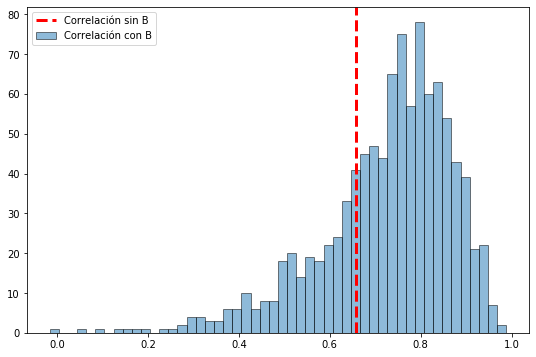

In [7]:
#Ahora, se hará el remuestreo con N=1000 bootstrap seleccionando 15 datos al azar diferentes en cada iteración, CON remplazo
#para n=15
print("¿Cuantas muestras desea realizar?")
siml=int(input())
print("¿Cúal será el tamaño de cada muestra?")
n=int(input())
corre=np.array( [ ])
escuelas=datos_escuelas["escuela"]
np.random.seed(23)
for i in range(0,siml):
    x_i=pd.DataFrame({'escuela': np.random.choice(escuelas,n,replace=True)})
    m = pd.merge(datos_escuelas,x_i,on="escuela")
    corr,_= spearmanr(m.LSAT, m.GPA)
    corre=np.append(corre,corr)

#haciendo el histograma tenemos
fig, ax = plt.subplots(figsize=(9,6))
hist(corre,bins=50,alpha=0.5,edgecolor="black",label="Correlación con B")
axvline(x=corrg,color='red', linestyle='--',linewidth=3,label="Correlación sin B")
legend()
show()

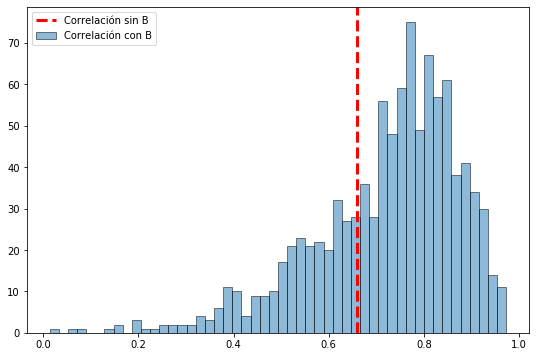

In [8]:
#para n-1
siml=siml
n1=n-1
corre2=np.array( [ ])
escuelas=datos_escuelas["escuela"]
np.random.seed(23)
for i in range(0,siml):
    x_i=pd.DataFrame({'escuela': np.random.choice(escuelas,n1,replace=True)})
    m = pd.merge(datos_escuelas,x_i,on="escuela")
    corr,_= spearmanr(m.LSAT, m.GPA)
    corre2=np.append(corre2,corr)

#para este histograma tenemos
fig, ax = plt.subplots(figsize=(9,6))
hist(corre2,bins=50,alpha=0.5,edgecolor="black",label="Correlación con B")
axvline(x=corrg,color='red', linestyle='--',linewidth=3,label="Correlación sin B")
legend()
show()

Calculamos el error estandar con Bootstrap usando la formula:
$\\$
$ \hat{se_{boot}}= \sqrt{\sum_{j = 1}^{B} \frac{(S(X^{j})-\sum_{j = 1}^{B} \frac{S(X^{j})}{B})^{2}}{B-1}}$

In [9]:
def se_boot(X):
    B = len(X)
    sum1 = mean(X)
    sum2 = 0
    for j in range(B):
        sum2 += ((X[j] - sum1)**2)/(B - 1)
    return sqrt(sum2)

In [10]:
#error al ocupar N=1000 y n=15
se_boot(corre)

0.1472463888736324

In [11]:
#error al ocupar N=1000 y n-1=14
se_boot(corre2)

0.15533686942557978

El código esta diseñado para que el usuario pueda dar el número de simulaciones ($N$) y el tamaño de cada muestra ($n$), tomando como ejemplo $N=1000$ y $n=15$, observamos lo siguiente:\
Tanto para el remuestreo Bootstrap con $n=15$, como para $n=14$ (n-1), otuvimos un error estandar relativamente pequeño, esto era de esperarse ya que al observar las gráficas notamos que no hay una concentración en valores atipicos, es decir, el coeficiente de correlación se concentra más a partir del coeficiente de correlación general (.753) en adelante.\
Cabe mencionar que el error es menor cuando nos tomamos una $n$ a cuando nos tomamos $n-1$ y de igual manera, es congruente. Si la muestra la estamos tomando para una n pequeña y con reamplazo, lo que se esta haciendo es recoger valores que nos estan sesgando los resultlados.
Lo que se esperaría es que para una n mayor a la que nos tomamos, el error sea más pequeño, posiblemente tendremos valores atipicos pero en menor medida.

¿Cuantas muestras desea realizar?
1000
¿Cúal será el tamaño de cada muestra?
41


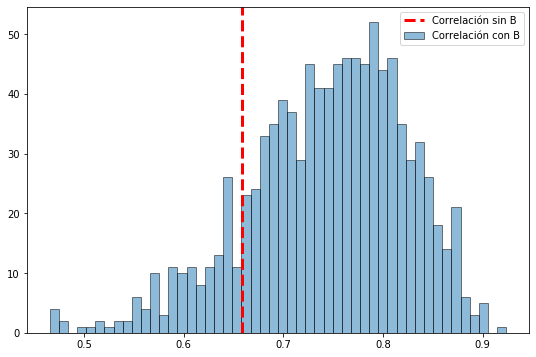

In [12]:
#al tomarnos otra n (41)
print("¿Cuantas muestras desea realizar?")
siml=int(input())
print("¿Cúal será el tamaño de cada muestra?")
n=int(input())
corre=np.array( [ ])
escuelas=datos_escuelas["escuela"]
np.random.seed(23)
for i in range(0,siml):
    x_i=pd.DataFrame({'escuela': np.random.choice(escuelas,n,replace=True)})
    m = pd.merge(datos_escuelas,x_i,on="escuela")
    corr,_= spearmanr(m.LSAT, m.GPA)
    corre=np.append(corre,corr)

#histograma 
fig, ax = plt.subplots(figsize=(9,6))
hist(corre,bins=50,alpha=0.5,edgecolor="black",label="Correlación con B")
axvline(x=corrg,color='red', linestyle='--',linewidth=3,label="Correlación sin B")
legend()
show()

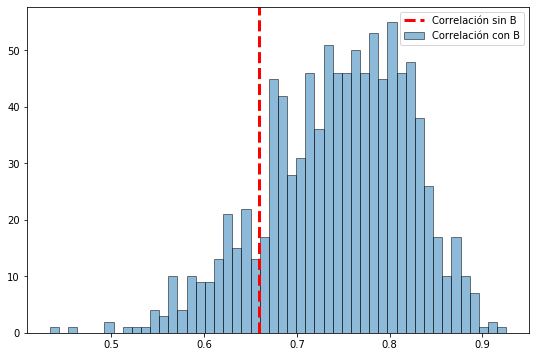

In [13]:
#con n-1
siml=siml
n1=n-1
corre2=np.array( [ ])
escuelas=datos_escuelas["escuela"]
np.random.seed(23)
for i in range(0,siml):
    x_i=pd.DataFrame({'escuela': np.random.choice(escuelas,n1,replace=True)})
    m = pd.merge(datos_escuelas,x_i,on="escuela")
    corr,_= spearmanr(m.LSAT, m.GPA)
    corre2=np.append(corre2,corr)

#histograma 
fig, ax = plt.subplots(figsize=(9,6))
hist(corre2,bins=50,alpha=0.5,edgecolor="black",label="Correlación con B")
axvline(x=corrg,color='red', linestyle='--',linewidth=3,label="Correlación sin B")
legend()
show()

In [14]:
#error con n diferente
se_boot(corre)

0.07966834587964701

In [15]:
#para n-1
se_boot(corre2)

0.07735379597986393

Como podemos observar en las últimas dos gráficas y en los dos valores del error, a comparación de lo obtenido al ocupar una $n=15$, estos errores son más pequeños. Dado los resultados obtenidos, podemos decir que más nos afecta es el valor de la $n$.
Sin embargo, al tomar una $n$ "mayor", cambia el valor del error, es decir,ahora para $n-1$ obtenemos un error menor a cuando nos tomamos $n$.